In [45]:
import matplotlib.pyplot as plt
import os
import math
import itertools

In [46]:
def printPlot(points, points2 = False):
    arrayOfX = []
    arrayOfY = []
    for i in points:
        arrayOfX.append(i[0])
        arrayOfY.append(i[1])
    fig, ax = plt.subplots()
    ax.grid()
    if (points2):
        arrayOfX2 = []
        arrayOfY2 = []
        for i in points2:
            arrayOfX2.append(i[0])
            arrayOfY2.append(i[1])
        plt.plot(arrayOfX2, arrayOfY2)
    else:
        plt.plot((115, 115, 135, 135, 115),(135, 115, 115, 135, 135))
    plt.plot(arrayOfX, arrayOfY)
    plt.show()

def normalizeArray(arr):
    # ['117.5 132.5 ', '132.5 132.5 ']  =>  [['117.5', '132.5'], ['132.5', '132.5']]
    a = []
    for i in arr:
        nums = i.split(' ')
        a.append([float(nums[0]),float(nums[1])])
    return(a)

def square(a):
    n = len(a)
    a.append([0, 0])
    a[n][0] = a[1][0]
    a[n][1] = a[1][1]
    s = 0
    for i in range(1, n):
        s = s + (a[i][0]*a[i+1][1] - a[i][1]*a[i+1][0])
    s = abs(s/2)
    a.pop()
    return s

def getCirclePoint(x,y,r,angle):
    x1 = x + r*math.cos(math.radians(angle))
    y1 = y + r*math.sin(math.radians(angle))
    return [round(x1, 2),round(y1, 2)]

def getCirclePoints(x,y,r,angle,direction,points):
    # getCirclePoints(startX, startX, R, 0-360, 0-360, )
    # 360 > angle > 0
    # 360 > direction > 0 
    if (angle < 0 and angle > 360): raise Exception('angle')
    if (direction < 0 and direction > 360): raise Exception('direction')
    arr = []
    fromRange = math.ceil(points * (direction/360))
    n = math.ceil(points * (angle/360))
    start = 1 + direction/360
    for i in range(fromRange, n + fromRange + 1):
        # print(i, i * angle/n, angle/n)
        arr.append(getCirclePoint(x,y,r,i  * (angle)/n))
    return arr

[[0, 0], [4, 3], [1, 3], [1, 1], [0, 4], [4, 4], [4, 1], [4, 0], [0, 0]]
10.5


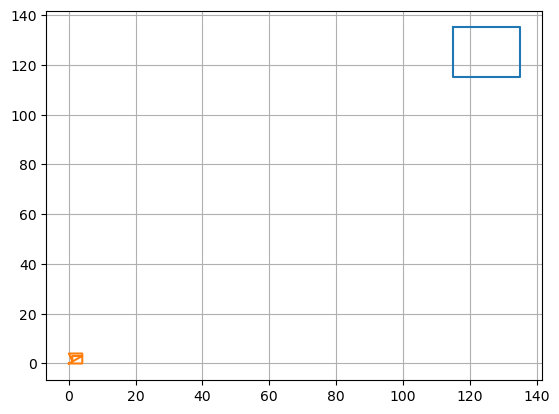

In [47]:
zapMas3 = [[0,0],[0,3],[3,3],[3,0],[0,0]]
zapMas4 = [[0,0],[4,3],[1,3],[1,1],[0,4],[4,4],[4,1],[4,0],[0,0]]

print(zapMas4)
print(square(zapMas4))
printPlot(zapMas4)

In [48]:
R = 1 # mm
POINTS = 36 # 36: 3.124     72: 3.1448


arr [[0, 0], [-4, 0], [-4, -4]]
vectors [[-4, 0], [0, -4], [0, 4], [4, 0]]
angles [-90.0, 180.0, 0.0, 90.0]
0 [-4, 0] -90.0
from start to -90
---
1 [0, -4] 180.0
180, -90
---
2 [0, 4] 0.0
0, 180
---
3 [4, 0] 90.0
90, 0
---


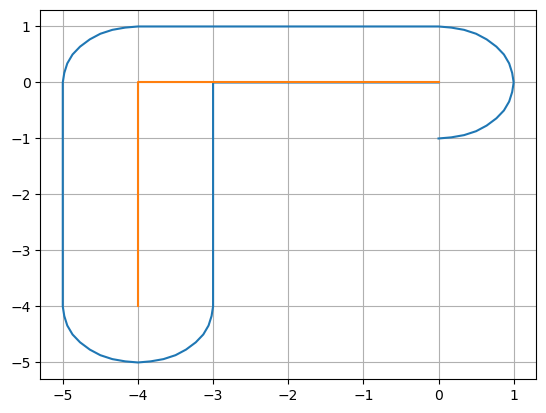

In [595]:
points = open(os.path.join(os.getcwd(),"5.txt"), "r", encoding='utf-8').read().split('\n')
arr = normalizeArray(points)

R = 1 # mm
POINTS = 36 # 36: 3.124     72: 3.1448

# line = ['117.5 132.5', '132.5 132.5']
# line = normalizeArray(line)
# printPlot(line)

# circlePoints2 = getCirclePoints(1, 1, R, 180, 0, POINTS)
def drawArea(arr):
    def getVectors(arr):
        vectors = []
        if (len(arr) == 2):
            print('len(arr) == 2')
        for i in range(1, len(arr)):
            point1 = arr[i-1]
            point2 = arr[i]
            vector1 = [point2[0] - point1[0], point2[1] - point1[1]]
            vectors.append(vector1)
        for i in range(-len(arr) + 1, 0):
            point1 = arr[abs(i)]
            point2 = arr[abs(i)-1]
            vector1 = [point2[0] - point1[0], point2[1] - point1[1]]
            vectors.append(vector1)
        return vectors
    
    def getAngles(vectors):
        angles = []
        for i in range(0, len(vectors)):
            angles.append(math.degrees(math.atan2(vectors[i][0], vectors[i][1])))
        return angles
    
    # vectors.insert(0, arr[0]) # vectors.insert(0, [0,0])
    # vectors.append([arr[0][0] - vectors[len(vectors)-1][0], arr[0][1] - vectors[len(vectors)-1][1]]) # vectors.insert(0, [0,0])
    print('arr',arr)
    vectors = getVectors(arr)
    print('vectors',vectors)
    angles = getAngles(vectors)
    print('angles', angles)
    figure = []
    if (len(arr) == 2):
        points = getCirclePoints(arr[0][0], arr[0][1], R, 180, 180-angles[0], POINTS)
        points2 = getCirclePoints(arr[1][0], arr[1][1], R, 180, 360-angles[0], POINTS)
        points2.append([points2[len(points2)-1][0] + vectors[1][0], points2[len(points2)-1][1] + vectors[1][1]])
        figure = list(itertools.chain.from_iterable([points, points2]))
        return figure
    else:
        for i in range(0, len(vectors)):
            # points = []
            print(i, vectors[i], angles[i])
            if (i == 0):
                if (angles[i] == 90):
                    print('from start to 90')
                    points = getCirclePoints(arr[i][0], arr[i][1], R, 180, 90, POINTS)
                    lastPoint = points[len(points)-1]
                    if (angles[i+1] == 0):
                        points.append([lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1]])
                    elif (angles[i+1] == 180):
                        points.append([lastPoint[0]+vectors[i][0] - R, lastPoint[1]+vectors[i][1]])

                elif (angles[i] == 0):
                    print('from start to 0') # ok
                    points = getCirclePoints(arr[i][0], arr[i][1], R, 180, 180, POINTS)
                    lastPoint = points[len(points)-1]
                    if (angles[i+1] == 0):
                        points.append([lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1] - R])
                    elif (angles[i+1] == 90): # ok
                        points.append([lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1] - R])

                elif (angles[i] == -90):
                    print('from start to -90')
                    points = getCirclePoints(arr[i][0], arr[i][1], R, 180, 270, POINTS)
                    lastPoint = points[len(points)-1]
                    if (angles[i+1] == 0): # не проверено
                        points.append([lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1]])
                    elif (angles[i+1] == 90): # не проверено
                        points.append([lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1]])
                    elif (angles[i+1] == 180): # ok
                        points.append([lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1]])
                    elif (angles[i+1] == -90): # не проверено
                        print('aoaoa')
                        points.append([lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1] + R])

                elif (angles[i] == 180):
                    print('from start to 180')
                    points = getCirclePoints(arr[i][0], arr[i][1], R, 180, 0, POINTS)
                    lastPoint = points[len(points)-1]
                    if (angles[i+1] == 0): # не проверено
                        print('aoaoa')
                        points.append([lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1]])
                    elif (angles[i+1] == 90): # ok
                        points.append([lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1]])
                    elif (angles[i+1] == 180): # не проверено
                        points.append([lastPoint[0]+vectors[i][0] - R, lastPoint[1]+vectors[i][1]])
                    elif (angles[i+1] == -90): # ok
                        points.append([lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1] + R])

                else:
                    points = getCirclePoints(arr[i][0], arr[i][1], R, 180, 180, POINTS)
            else:
                if (angles[i] == 0):
                    # points = getCirclePoints(arr[i][0], arr[i][1], R, 180, 180, POINTS)
                    if (angles[i-1] == 90):
                        print('0, 90')
                        lastPoint = points[len(points)-1]
                        points = getCirclePoints(lastPoint[0], lastPoint[1] + R, R, 90, 270, POINTS)
                        lastPoint2 = points[len(points)-1]
                        points.append([lastPoint2[0]+vectors[i][0], lastPoint2[1]+vectors[i][1]])
                    elif (angles[i-1] == 0):
                        print('0, 0', i)
                    elif (angles[i-1] == -90):
                        print('0, -90', i)
                        lastPoint = points[len(points)-1]
                        points = [lastPoint, [lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1] - R]]
                    elif (angles[i-1] == 180):
                        print('0, 180') # ok
                        lastPoint = points[len(points)-1]
                        points = getCirclePoints(lastPoint[0] + R, lastPoint[1], R, 180, 180, POINTS)
                        lastPoint2 = points[len(points)-1]
                        points.append([lastPoint2[0]+vectors[i][0], lastPoint2[1]+vectors[i][1]])

                elif (angles[i] == 90):
                    if (angles[i-1] == 90):
                        print('90, 90')
                    elif (angles[i-1] == 0):
                        print('90, 0') # ok
                        lastPoint = points[len(points)-1]
                        points = [lastPoint, [lastPoint[0]+vectors[i][0] - R, lastPoint[1]+vectors[i][1]]]
                    elif (angles[i-1] == -90):
                        print('90, -90') # ok
                        lastPoint = points[len(points)-1]
                        points = getCirclePoints(lastPoint[0], lastPoint[1] - R, R, 180, 90, POINTS)
                        lastPoint2 = points[len(points)-1]
                        points.append([lastPoint2[0]+vectors[i][0], lastPoint2[1]+vectors[i][1]])
                    elif (angles[i-1] == 180):
                        print('90, 180') # ok
                        lastPoint = points[len(points)-1]
                        points = getCirclePoints(lastPoint[0] + R, lastPoint[1], R, 90, 180, POINTS)
                        lastPoint2 = points[len(points)-1]
                        points.append([lastPoint2[0]+vectors[i][0], lastPoint2[1]+vectors[i][1]])

                elif (angles[i] == -90):
                    if (angles[i-1] == 90):
                        print('-90, 90') # ok
                        lastPoint = points[len(points)-1]
                        points = getCirclePoints(arr[i][0], arr[i][1], R, 180, 270, POINTS)
                        lastPoint2 = points[len(points)-1]
                        if (angles[i+1] == 0): #ok
                            points.append([lastPoint2[0]+vectors[i][0] + R, lastPoint2[1]+vectors[i][1]])
                        else:
                            points.append([lastPoint2[0]+vectors[i][0], lastPoint2[1]+vectors[i][1]])
                    elif (angles[i-1] == 0):
                        print('-90, 0') # ok
                        lastPoint = points[len(points)-1]
                        points = getCirclePoints(lastPoint[0] - R, lastPoint[1], R, 90, 0, POINTS)
                        lastPoint2 = points[len(points)-1]
                        points.append([lastPoint2[0]+vectors[i][0], lastPoint2[1]+vectors[i][1]])
                    elif (angles[i-1] == -90):
                        print('-90, -90')
                    elif (angles[i-1] == 180):
                        print('-90, 180') # ok
                        lastPoint = points[len(points)-1]
                        points = [lastPoint, [lastPoint[0]+vectors[i][0] + R, lastPoint[1]+vectors[i][1]]]
                    
                elif (angles[i] == 180):
                    if (angles[i-1] == 90):
                        print('180, 90') # ok
                        lastPoint = points[len(points)-1]
                        points = [lastPoint, [lastPoint[0]+vectors[i][0], lastPoint[1]+vectors[i][1] + R]]
                    elif (angles[i-1] == 0):
                        print('180, 0') # ok
                        lastPoint = points[len(points)-1]
                        points = getCirclePoints(lastPoint[0] - R, lastPoint[1], R, 180, 0, POINTS)
                        lastPoint2 = points[len(points)-1]
                        points.append([lastPoint2[0]+vectors[i][0], lastPoint2[1]+vectors[i][1] + R])
                    elif (angles[i-1] == -90):
                        print('180, -90') #ok
                        lastPoint = points[len(points)-1]
                        points = getCirclePoints(lastPoint[0], lastPoint[1] - R, R, 90, 90, POINTS)
                        lastPoint2 = points[len(points)-1]
                        points.append([lastPoint2[0]+vectors[i][0], lastPoint2[1]+vectors[i][1]])
                    elif (angles[i-1] == 180):
                        print('180, 180')
                        
                else:
                    # points.append(getCirclePoint(arr[1][0],arr[1][1],R,300))
                    points = getCirclePoints(arr[2][0], arr[2][1], R, 180, 360-angles[i], POINTS)
                    print("ELSE",getCirclePoint(arr[1][0],arr[1][1],R,53))
                    # points.append(getCirclePoint(arr[1][0],arr[1][1],R,53))
                
            # print("appended",points)
            print("---")
            # figure.append(points)
            figure = list(itertools.chain.from_iterable([figure, points]))
            
        # for i in points:
        #     figure = list(itertools.chain.from_iterable([figure, i]))
        return figure

# a = [[0,0],[0,4],[-4,4]] # works
# a = [[0,0],[0,4],[4,4]] # works
# a = [[0,0],[4,0],[4,4]] # works
# a = [[0,0],[4,0],[4,-4]] # works
# a = [[0,0],[0,-4],[4,-4]] # works
# a = [[0,0],[0,-4],[-4,-4]] # works
a = [[0,0],[-4,0],[-4,-4]] # works

figure = drawArea(a)
# print('figure', figure)
printPlot(a, figure)
# print(square(figure))